# Deeplabv3 Segmentaion

## Dataset
gdown ID 
- Binary 
  - Resize 512x512, padding Original : 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03
  - Augmentation Train : 1weHJqe9aGPH1I6bP1K7FzRglIcFfW1fH
  - Augmentation Valid : 17xTOcDDZPlmZTz4kn1oTozjt_mdulrNz



## Original dataset download and train

### Git clone

In [44]:
cd /content

/content


In [50]:
!git clone https://github.com/jcjang1/CodeEnter_DeepLabv3FineTuning.git

fatal: destination path 'CodeEnter_DeepLabv3FineTuning' already exists and is not an empty directory.


### Dataset download

In [1]:
!gdown 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03

Downloading...
From: https://drive.google.com/uc?id=1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03
To: /content/512_padding_data_220722.zip
100% 59.5M/59.5M [00:00<00:00, 250MB/s]


In [ ]:
!unzip /content/512_padding_data_220722.zip

### Make folder
- 원하는 데이터 class 번호만 바꿔주면서 작업
- ex)

```
!mv {class 번호} data_set
```



In [3]:
cd /content/make_data

/content/make_data


In [4]:
!mv 4 data_set
!mv ./data_set/images ./data_set/Images
!mv ./data_set/masks ./data_set/Masks

### Trainning

In [7]:
cd /content/CodeEnter_DeepLabv3FineTuning

/content/CodeEnter_DeepLabv3FineTuning


In [ ]:
!python main.py --data-directory /content/make_data/data_set --exp_directory CFExp

## Augmentation dataset download and train

### Git clone

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/jcjang1/CodeEnter_DeepLabv3FineTuning.git

fatal: destination path 'CodeEnter_DeepLabv3FineTuning' already exists and is not an empty directory.


### Aug dataset download

In [30]:
!gdown 1weHJqe9aGPH1I6bP1K7FzRglIcFfW1fH
!gdown 17xTOcDDZPlmZTz4kn1oTozjt_mdulrNz

Downloading...
From: https://drive.google.com/uc?id=1weHJqe9aGPH1I6bP1K7FzRglIcFfW1fH
To: /content/CodeEnter_DeepLabv3FineTuning/bin_train_data.zip
100% 107M/107M [00:01<00:00, 55.2MB/s] 
Downloading...
From: https://drive.google.com/uc?id=17xTOcDDZPlmZTz4kn1oTozjt_mdulrNz
To: /content/CodeEnter_DeepLabv3FineTuning/bin_valid_data.zip
100% 31.7M/31.7M [00:00<00:00, 148MB/s] 


### Make folder
- 원하는 데이터 class 번호만 바꿔주면서 작업
- ex)

```
!mv /content/aug_data/{class번호} /content/aug_data/Train
!mv /content/test_data/{class번호} /content/test_data/Test
```



In [33]:
!mkdir aug_data_set

In [ ]:
!unzip /content/bin_train_data.zip
!unzip /content/bin_valid_data.zip

In [ ]:
!mv /content/aug_data/4 /content/aug_data/Train
!mv /content/test_data/4 /content/test_data/Test

!mv /content/aug_data/Train/images /content/aug_data/Train/Images
!mv /content/aug_data/Train/masks /content/aug_data/Train/Masks

!mv /content/test_data/Test/images /content/test_data/Test/Images
!mv /content/test_data/Test/masks /content/test_data/Test/Masks

In [45]:
!cp -r /content/aug_data/Train ./aug_data_set
!cp -r /content/test_data/Test ./aug_data_set

### Trainning

In [51]:
cd /content/CodeEnter_DeepLabv3FineTuning

/content/CodeEnter_DeepLabv3FineTuning


In [ ]:
!python sep_main.py --data-directory /content/aug_data_set --exp_directory CFExp

Epoch 1/15
----------
100% 120/120 [03:27<00:00,  1.73s/it]
Train Loss: 0.0260
100% 14/14 [00:13<00:00,  1.05it/s]
Test Loss: 0.0915
{'epoch': 1, 'Train_loss': 0.02603794075548649, 'Test_loss': 0.09146878123283386, 'Train_f1_score': 0.16414168894252645, 'Train_auroc': 0.7488944687127995, 'Train_iou': 0.09387291584679881, 'Test_f1_score': 0.3018690514275113, 'Test_auroc': 0.7481055327178313, 'Test_iou': 0.2036329824629373}
Epoch 2/15
----------
  8% 9/120 [00:15<03:10,  1.71s/it]

## Inference

In [13]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
# Load the trained model 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

### Visualizing

In [15]:
df = pd.read_csv('/content/CodeEnter_DeepLabv3FineTuning/CFExp/log.csv')
df[-1:]

,epoch,Train_loss,Test_loss,Train_f1_score,Train_auroc,Train_iou,Test_f1_score,Test_auroc,Test_iou
14,15,0.009638,0.076053,0.66554,0.975952,0.556801,0.359163,0.730262,0.268831


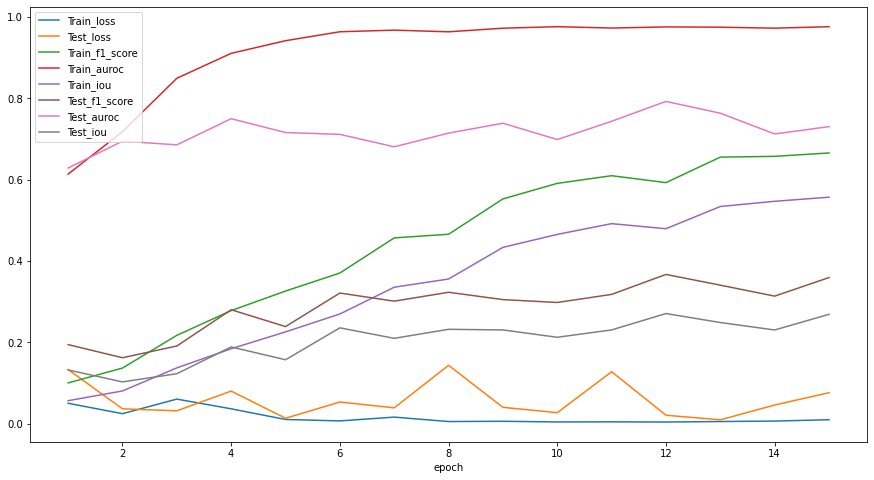

In [16]:
df.plot(x='epoch',figsize=(15,8));

In [17]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.975999
Test_auroc     0.792268
dtype: float64


In [27]:
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/make_data/data_set/Images/a_010.jpg').transpose(2,0,1)
img = img.reshape(1,3,img.shape[1],img.shape[2])
mask = cv2.imread('/content/make_data/data_set/Masks/a_010.jpg')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([  1782.,  48506., 149715.,   7091.,   4971.,   4435.,   4700.,
          6392.,  16050.,  18502.]),
 array([-0.39449978, -0.21458068, -0.03466158,  0.14525752,  0.32517663,
         0.5050957 ,  0.68501484,  0.8649339 ,  1.044853  ,  1.2247721 ,
         1.4046912 ], dtype=float32),
 <a list of 10 Patch objects>)

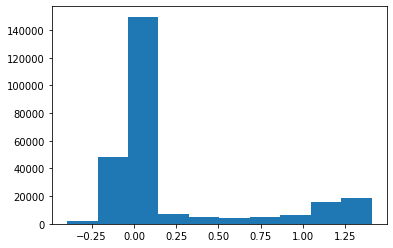

In [28]:
plt.hist(a['out'].data.cpu().numpy().flatten())

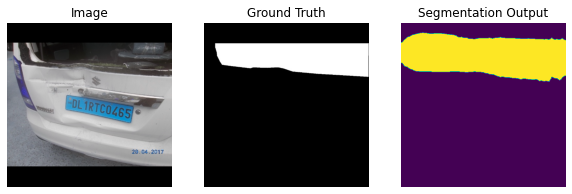

In [29]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')